https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance?select=student_habits_performance.csv el elegido
https://www.kaggle.com/datasets/aryan208/student-habits-and-academic-performance-dataset cualquier cosa revisar este


# 1. INTRODUCCIÓN

## 1.1 Descripción del DataSet

Base de datos simulada obtenida a través de Kaggle que contiene 1000 registros sintéticos de estudiantes y más de 15 características sobre sus hábitos durante el cursado de una materia. Dichos hábitos incluyen horas de estudio, patrones de sueño, uso de redes sociales, calidad de la dieta, salud mental y calificaciones de exámenes finales.

Columnas:
- student_id: id del estudiante - objeto.
- age: edad del estudiante - entero
- gender: género del estudiante (femenino, masculino u otro) - objeto.
- study_hours_per_day: horas de estudio promedio por día - float.
- social_media_hours: horas diarias de uso de redes sociales - float.
- netflix_hours: horas diarias viendo netflix - float.
- part_time_job: trabajo part time (sí o no) - objeto.
- attendance_percentage: porcentaje de asistencia a las clases - float.
- sleep_hours: horas de sueño - float.
- diet_quality: calidad de la dieta (pobre, justa, buena) - objeto.
- excercise_frequency: frecuencia semanal de práctica de ejercicio físico - entero.
- parental_education_level: nivel educativo de los progenitores (Secundario completo, Bachelor, Master o desconocido) - objeto.
- internet_quality: calidad de señal de internet (buena, regular, mala) - objeto.
- mental_health_rating: escala del 1 al 10 de estado de salud mental (1 bajo, 10 alto o bueno) - entero.
- extracurricular_participation: participación extracurricular (sí o no) - objeto.
- exam_score: calificación en el exámen final - float.

## 1.2 Objetivo

Desarrollar un modelo de regresión que pueda predecir la puntuación del examen (exam_score) de los estudiantes basándose en sus hábitos de estudio (study_hours_per_day), características demográficas (age, gender), uso de tecnología (social_media_hours, netflix_hours), factores de estilo de vida (part_time_job, sleep_hours, diet_quality, exercise_frequency, extracurricular_participation), entorno de apoyo (parental_education_level, internet_quality) y bienestar mental (mental_health_rating).

##1.3 Hipótesis

**Hipótesis Nula (H0​):** Las características demográficas, de hábitos de estudio, uso de tecnología, estilo de vida, entorno de apoyo y bienestar mental disponibles no son suficientes para predecir la exam_score (puntuación del examen) de los estudiantes con un error significativamente menor que un modelo ingenuo.

**Hipótesis Alternativa (H1​):** Es posible construir un modelo de regresión utilizando las características demográficas, de hábitos de estudio, uso de tecnología, estilo de vida, entorno de apoyo y bienestar mental que prediga la exam_score con un error significativamente menor que un modelo ingenuo. Esperamos alcanzar un R2 (R-cuadrado) > 0.60.

### **Preguntas a responder y exponer en la Presentación**

**Pregunta principal:**

¿Qué impacto tienen los hábitos/estilo de vida en el resultado académico de los estudiantes?

**Preguntas secundarias:**
* ¿Cómo se relaciona una vida saludable (buena alimentación, ejercicio, sueño)
con el éxito en los estudios?
* ¿Cómo afecta el tiempo dedicado a las redes sociales y  netflix en el resultado académico? ¿Es importante tener buen acceso a internet para tener buenas notas?
* ¿Cuál es el hábito más determinante para el éxito académico?


## 1.4 Importación de librerías y lectura del DataSet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Configuraciones para visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/coder/Data Scientist/student_habits_performance.csv')

In [ ]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


## 1.5 Información básica del DataSet

In [ ]:
df.shape

(1000, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [ ]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


# 2. ANÁLISIS EXPLORATORIO DE DATOS

## 2.1 Revisión de valores faltantes

In [ ]:
missing_values = df.isnull().sum()

In [ ]:
missing_values

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [ ]:
print("Valores nulos antes de la imputación:")
print(df['parental_education_level'].isnull().sum())

Valores nulos antes de la imputación:
91


In [ ]:
# Imputación de los valores nulos en 'parental_education_level' con 'Unknown'
df['parental_education_level'].fillna('Unknown', inplace=True)

<ipython-input-13-a7f8fb19f5ef>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['parental_education_level'].fillna('Unknown', inplace=True)


In [ ]:
print("\nValores nulos después de la imputación:")
print(df['parental_education_level'].isnull().sum())


Valores nulos después de la imputación:
0


In [ ]:
print("\nConteo de valores de la columna 'parental_education_level' después de la imputación:")
print(df['parental_education_level'].value_counts())


Conteo de valores de la columna 'parental_education_level' después de la imputación:
parental_education_level
High School    392
Bachelor       350
Master         167
Unknown         91
Name: count, dtype: int64


## 2.2 Distribución de la variable objetivo (exam_score) y demás variables numéricas

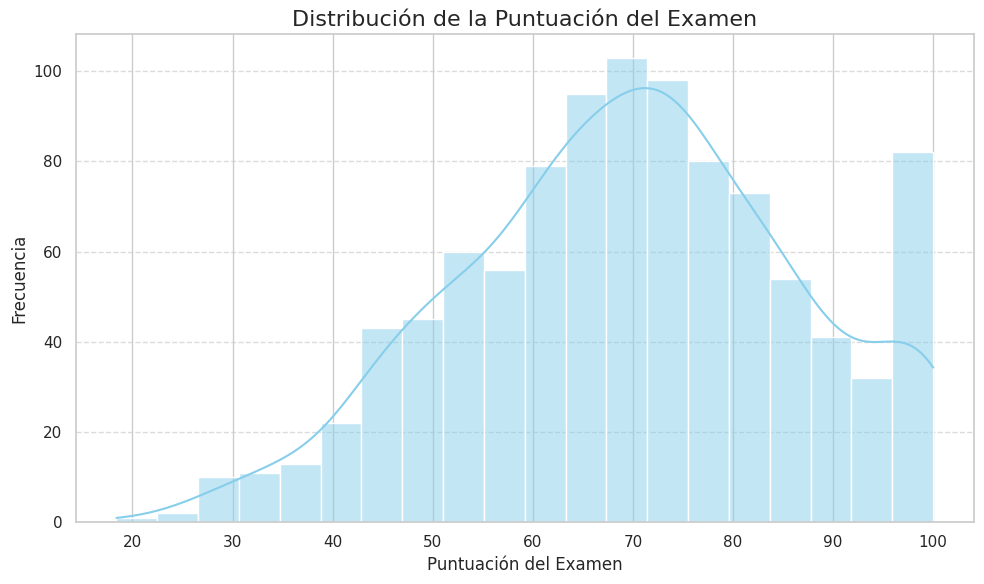

In [ ]:
# 1. Distribución de la Puntuación del Examen
plt.figure(figsize=(10, 6))
sns.histplot(df['exam_score'], kde=True, bins=20, color='skyblue')
plt.title('Distribución de la Puntuación del Examen', fontsize=16)
plt.xlabel('Puntuación del Examen', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

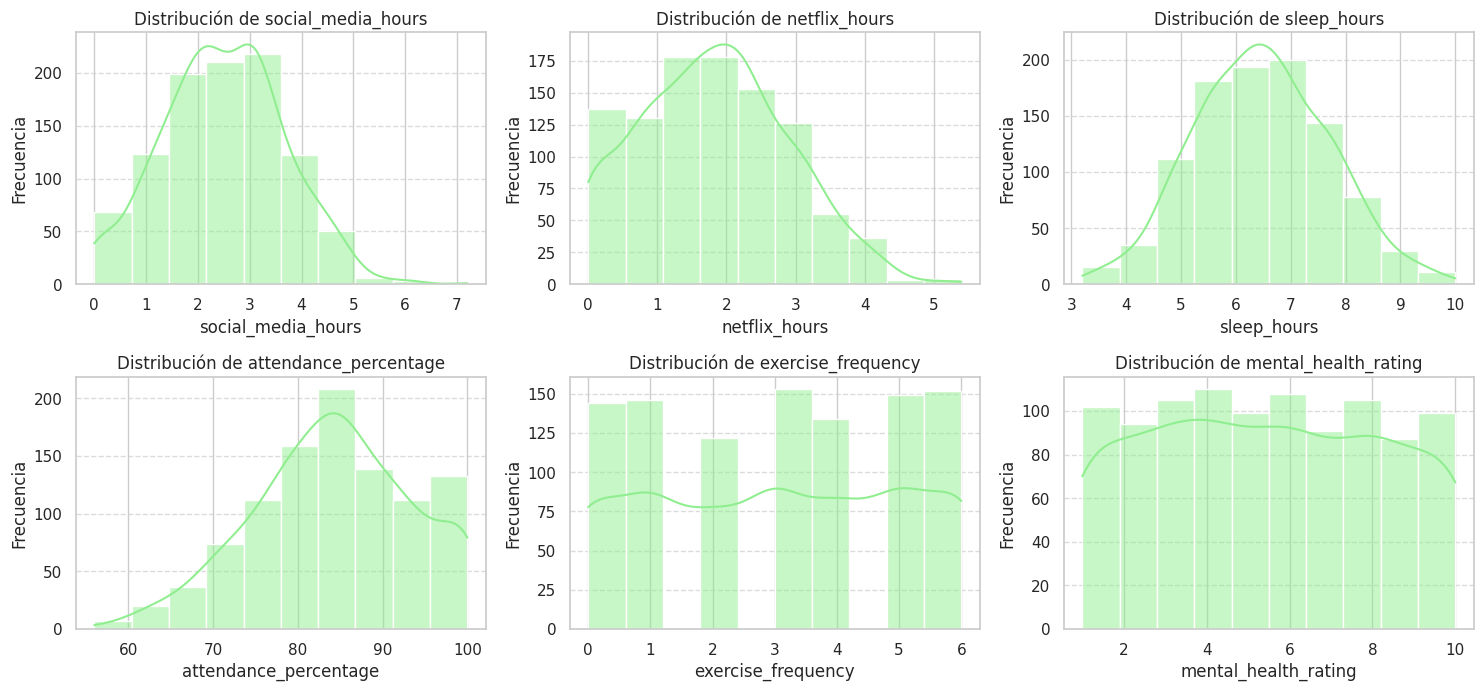

In [ ]:
#  2. Distribución de otras variables numéricas clave
numerical_cols_for_dist = [ 'social_media_hours', 'netflix_hours',
                           'sleep_hours', 'attendance_percentage', 'exercise_frequency',
                           'mental_health_rating']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_for_dist):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=10, color='lightgreen')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 2.3 Matriz de correlación de Variables Numéricas

In [ ]:
#  3. Matriz de Correlación de Variables Numéricas
# Seleccionamos solo las columnas numéricas para la matriz de correlación
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('student_id', errors='ignore')

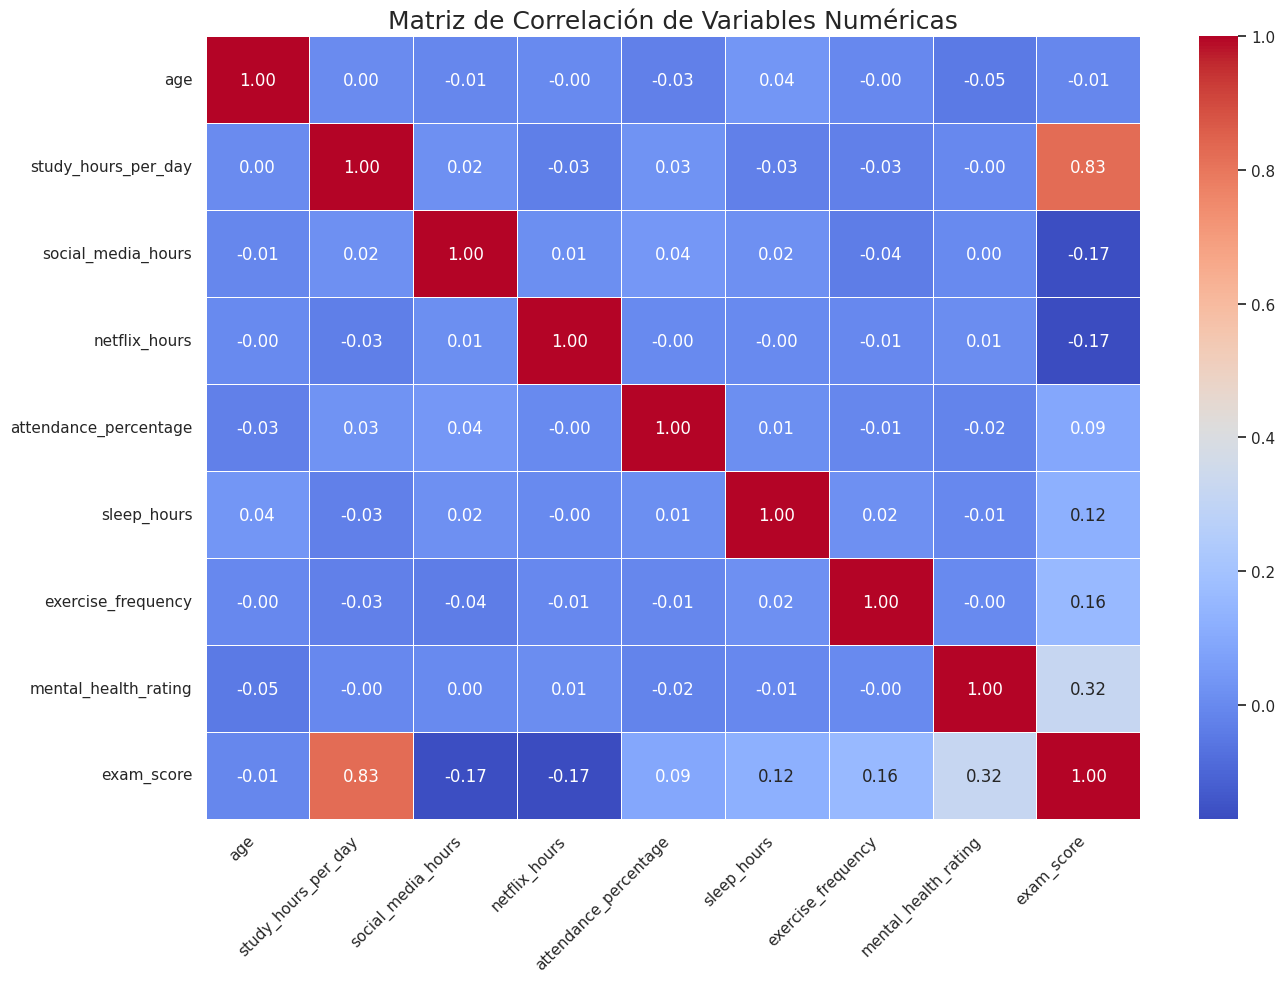

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Observaciones: se detecta una fuerte correlación positiva entre el exam_score (nota del examen) y las study_hours_per_day (horas de estudio por día)

## 2.4 Diagramas de dispersión variables numéricas vs. exam_score

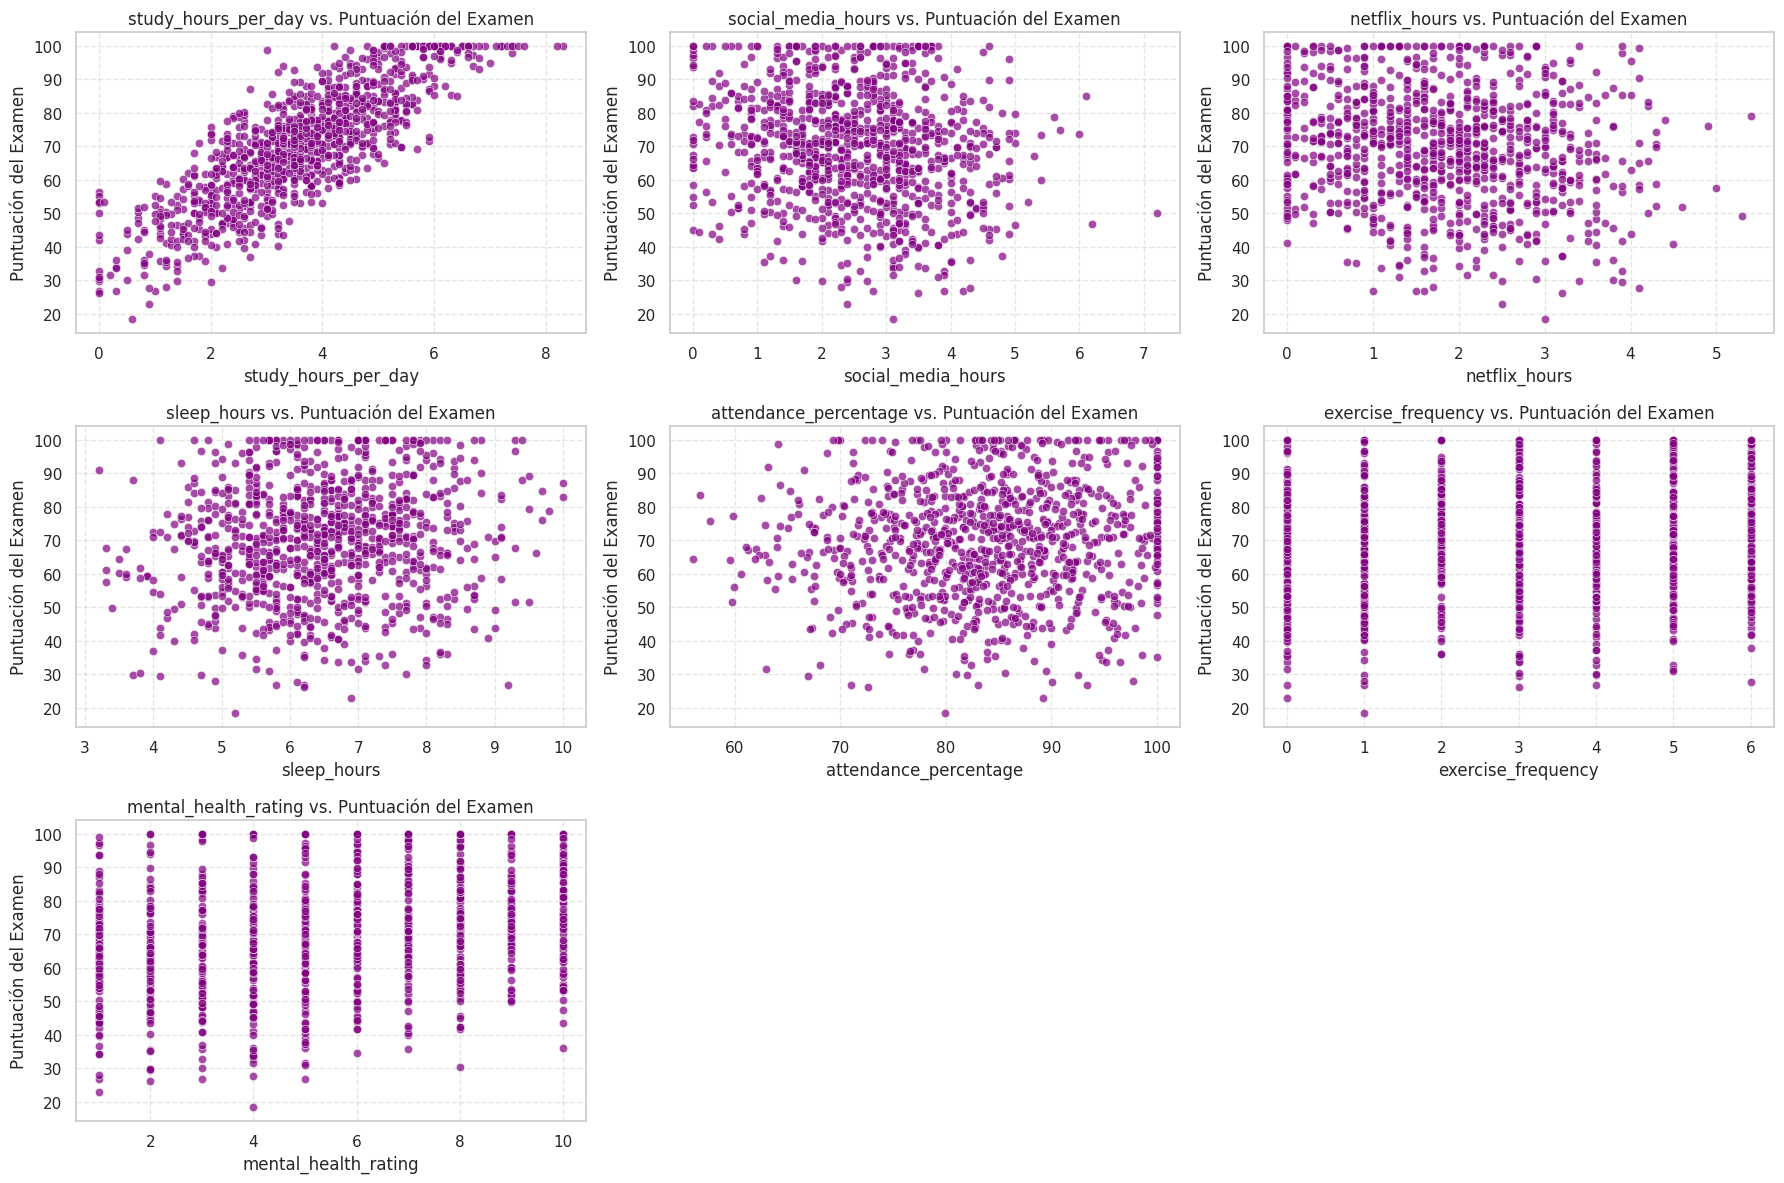

In [ ]:
#  4. Relación entre variables numéricas y exam_score (Scatter Plots)
scatter_cols = ['study_hours_per_day', 'social_media_hours', 'netflix_hours',
                'sleep_hours', 'attendance_percentage', 'exercise_frequency',
                'mental_health_rating']

plt.figure(figsize=(18, 12))
for i, col in enumerate(scatter_cols):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=col, y='exam_score', data=df, alpha=0.7, color='purple')
    plt.title(f'{col} vs. Puntuación del Examen')
    plt.xlabel(col)
    plt.ylabel('Puntuación del Examen')
    plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 2.5  Visualización de Outliers variables numéricas

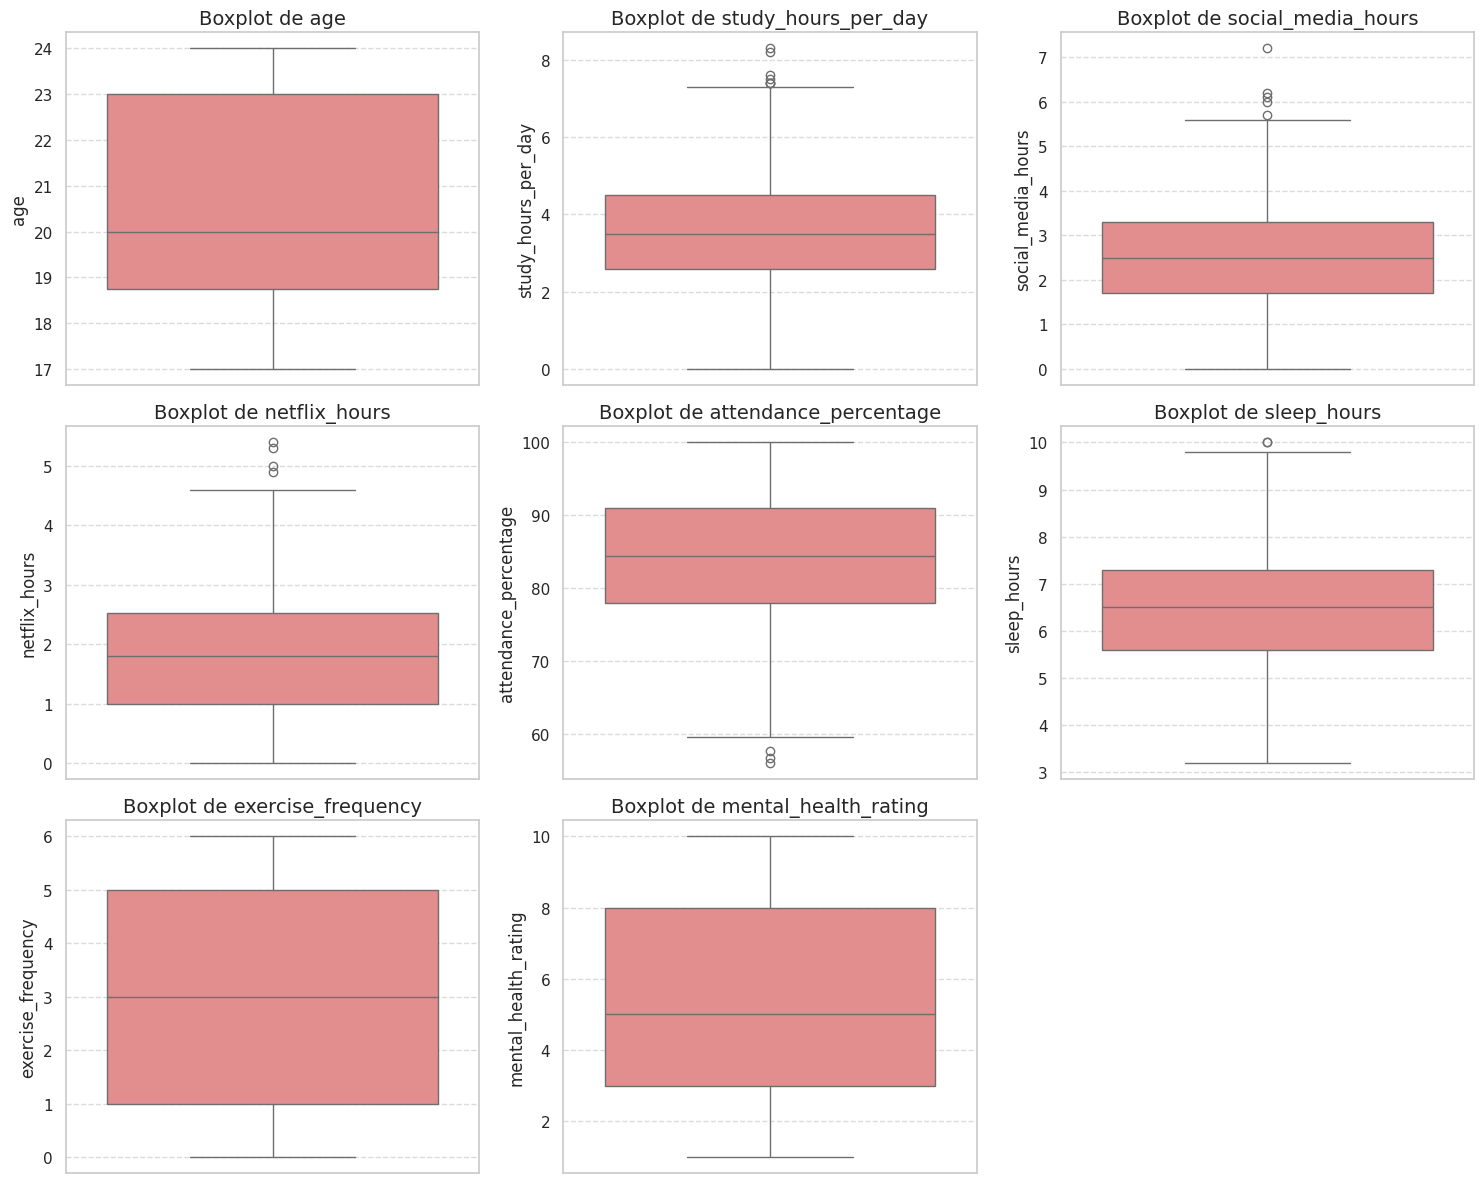

In [ ]:
numerical_cols_for_outliers = [
    'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating'
]

# Determinar el número de subplots necesarios y el diseño de la cuadrícula
n_cols = 3 # Número de columnas para la cuadrícula de gráficos
n_rows = (len(numerical_cols_for_outliers) + n_cols - 1) // n_cols # Calcula el número de filas necesario

plt.figure(figsize=(n_cols * 5, n_rows * 4)) # Ajusta el tamaño de la figura

for i, col in enumerate(numerical_cols_for_outliers):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col], color='lightcoral') # Usamos 'y' para boxplots verticales
    plt.title(f'Boxplot de {col}', fontsize=14)
    plt.ylabel(col, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## 2.6 Exploración variables categóricas

In [ ]:
categorical_cols = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level',
                    'internet_quality', 'extracurricular_participation']

In [ ]:
for col in categorical_cols:
    print(f"--- Columna: '{col}' ---")
    counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100

    # Crear un DataFrame temporal para mostrar ambos de forma ordenada
    summary_df = pd.DataFrame({'Count': counts, 'Percentage': percentages.round(1)})
    print(summary_df)
    print("\n" + "=" * 50 + "\n") # Separador para claridad

--- Columna: 'gender' ---
        Count  Percentage
gender                   
Female    481        48.1
Male      477        47.7
Other      42         4.2


--- Columna: 'part_time_job' ---
               Count  Percentage
part_time_job                   
No               785        78.5
Yes              215        21.5


--- Columna: 'diet_quality' ---
              Count  Percentage
diet_quality                   
Fair            437        43.7
Good            378        37.8
Poor            185        18.5


--- Columna: 'parental_education_level' ---
                          Count  Percentage
parental_education_level                   
High School                 392        39.2
Bachelor                    350        35.0
Master                      167        16.7
Unknown                      91         9.1


--- Columna: 'internet_quality' ---
                  Count  Percentage
internet_quality                   
Good                447        44.7
Average             391    

## 2.7 Visualización de Outliers variables categóricas

<ipython-input-25-246842fa86dc>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='exam_score', data=df, palette='viridis', order=order)
<ipython-input-25-246842fa86dc>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='exam_score', data=df, palette='viridis', order=order)
<ipython-input-25-246842fa86dc>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='exam_score', data=df, palette='viridis', order=order)
<ipython-input-25-246842fa86dc>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

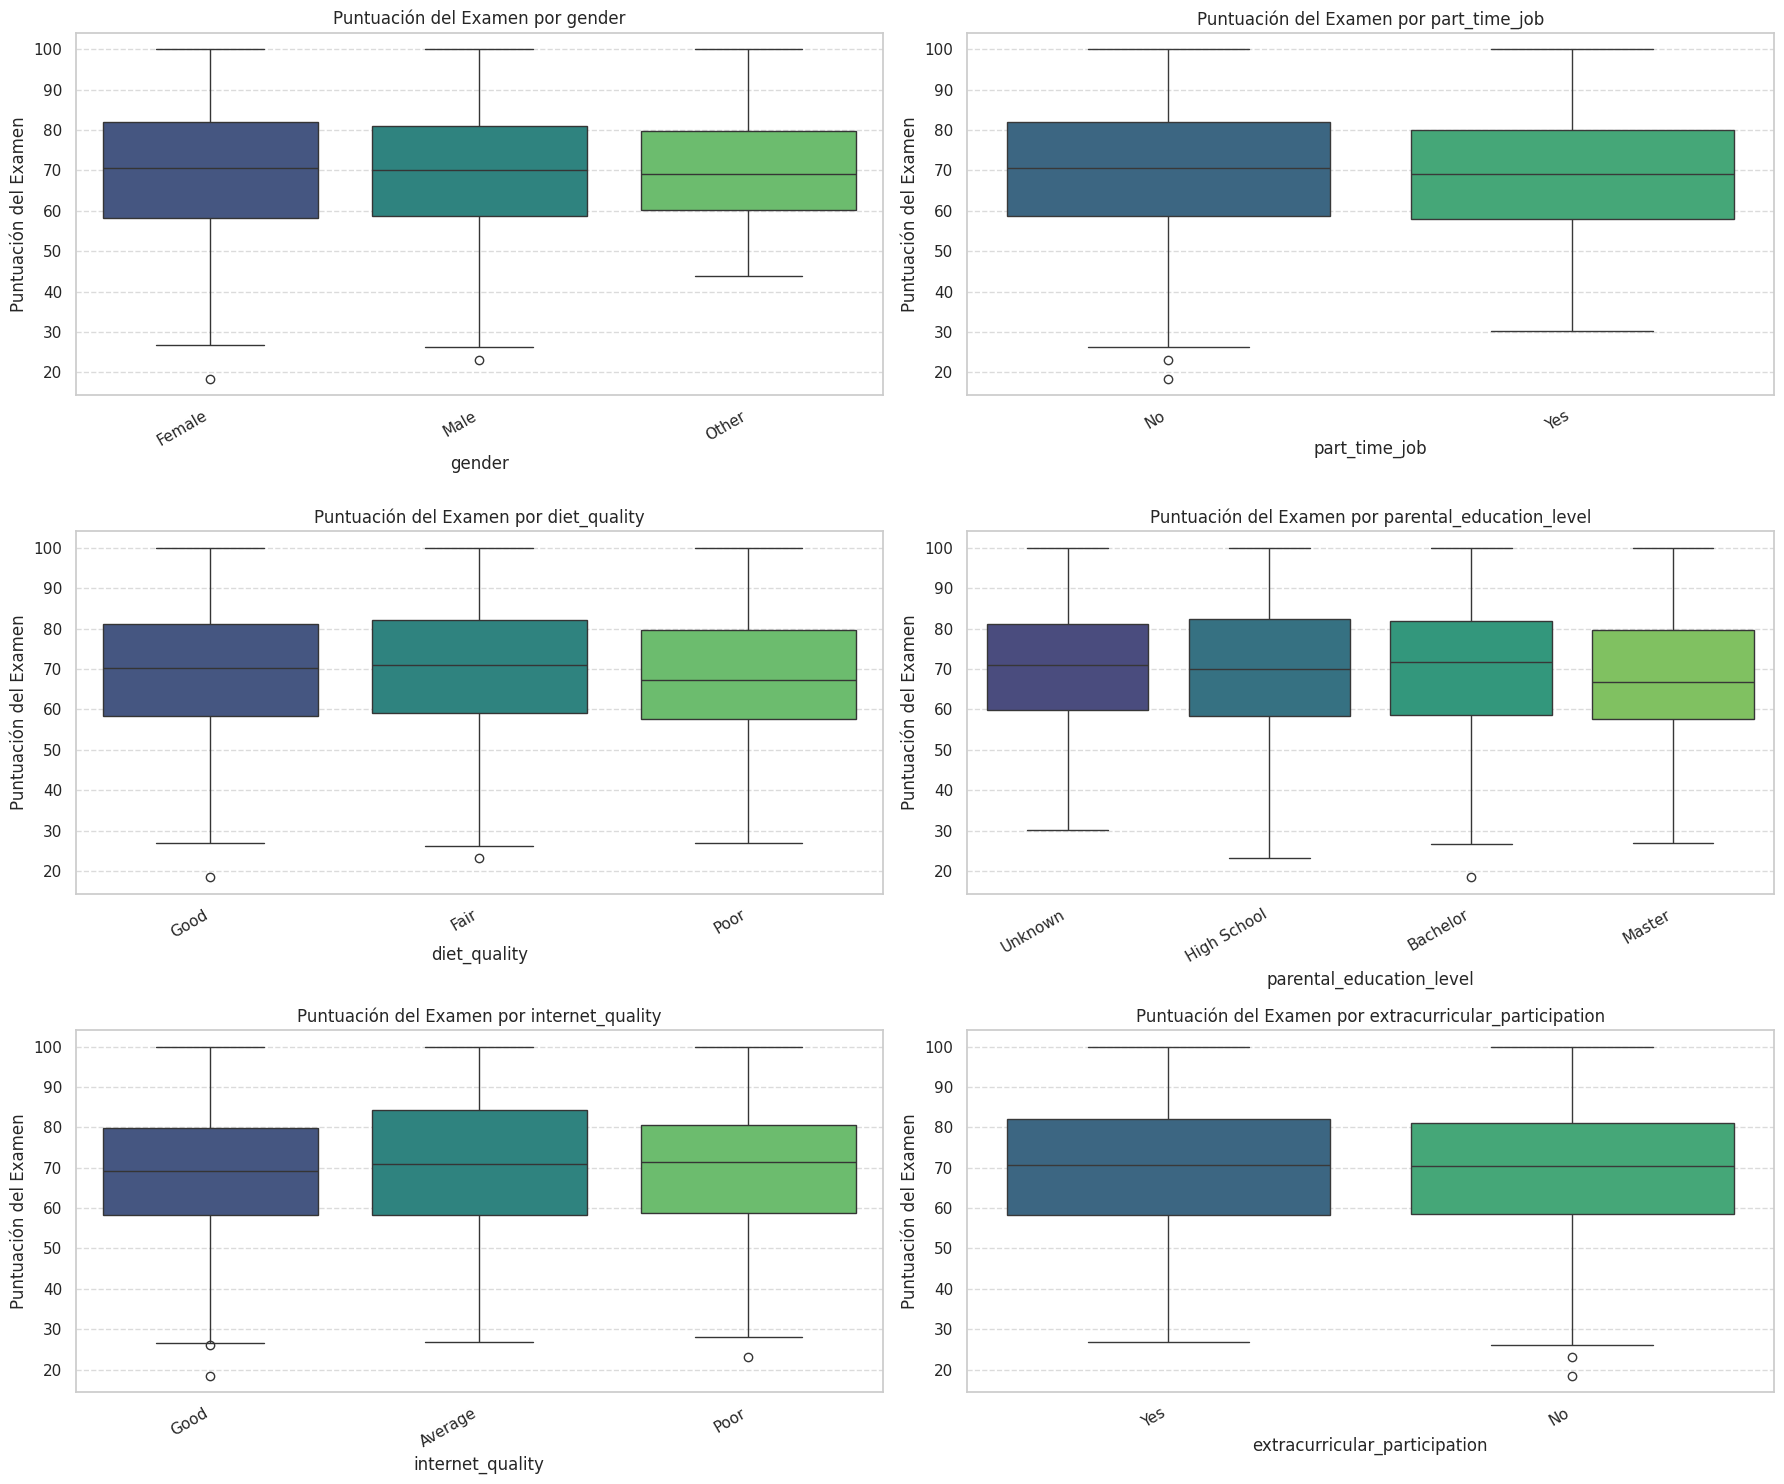

In [ ]:
plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1)
    # Definir el orden para algunas variables categóricas para mejor visualización
    if col == 'diet_quality':
        order = ['Good', 'Fair', 'Poor']
    elif col == 'parental_education_level':
        order = ['Unknown', 'High School', 'Bachelor', 'Master']
    elif col == 'internet_quality':
        order = ['Good', 'Average', 'Poor']
    else:
        order = None

    sns.boxplot(x=col, y='exam_score', data=df, palette='viridis', order=order)
    plt.title(f'Puntuación del Examen por {col}')
    plt.xlabel(col)
    plt.ylabel('Puntuación del Examen')
    plt.xticks(rotation=30, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 2.8 BLOQUE 1: ¿Cómo se relaciona una vida saludable (buena alimentación, ejercicio, sueño) con el éxito en los estudios?

<ipython-input-40-7c8400bae065>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diet_quality', y='exam_score', data=df, order=order_diet, palette='YlGnBu')


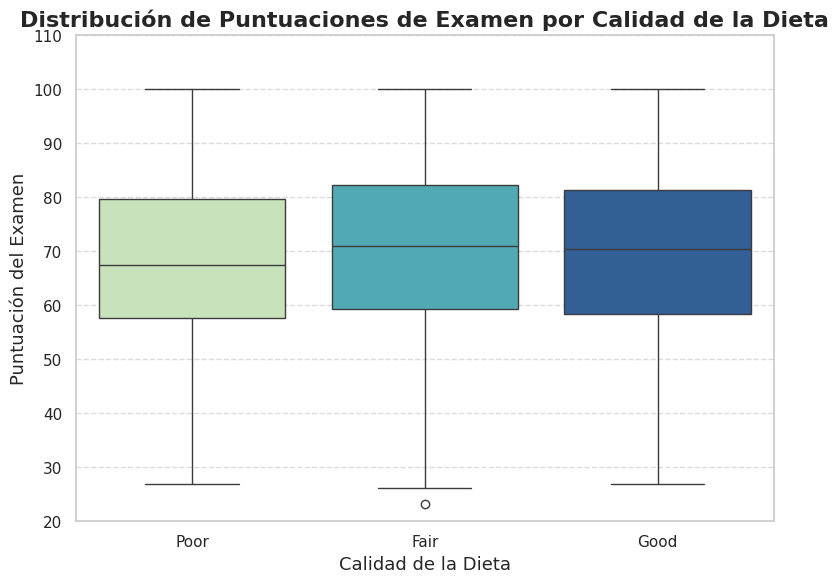

In [ ]:
# Gráfico de Cajas (Box Plot) para Calidad de la Dieta vs. Puntuación del Examen
plt.figure(figsize=(8, 6))
order_diet = ['Poor', 'Fair', 'Good'] # Asegurar el orden lógico
sns.boxplot(x='diet_quality', y='exam_score', data=df, order=order_diet, palette='YlGnBu')

plt.title('Distribución de Puntuaciones de Examen por Calidad de la Dieta', fontsize=16, fontweight='bold')
plt.xlabel('Calidad de la Dieta', fontsize=13)
plt.ylabel('Puntuación del Examen', fontsize=13)
plt.ylim(20, 110) # Rango de 0 a 100 para la puntuación del examen
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

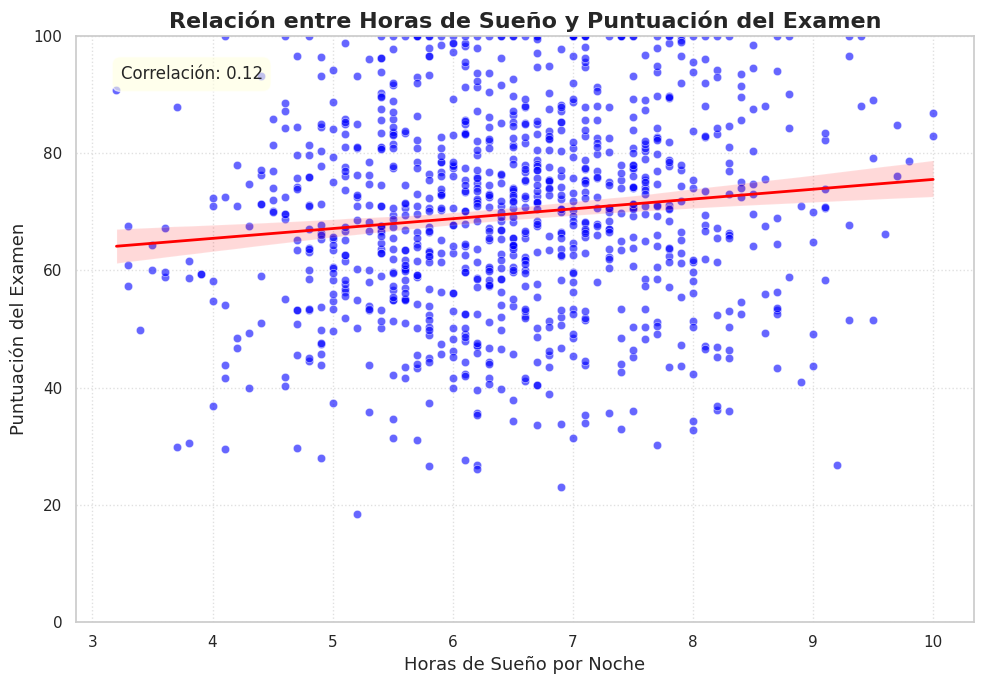

In [ ]:
# Gráfico para "Horas de Sueño"
plt.figure(figsize=(10, 7))
ax = sns.scatterplot(data=df, x='sleep_hours', y='exam_score', alpha=0.6, color='blue')
sns.regplot(data=df, x='sleep_hours', y='exam_score', scatter=False, color='red', line_kws={'linestyle': '-', 'linewidth': 2})

# Calcular y añadir correlación
correlation_sleep = df['sleep_hours'].corr(df['exam_score'])
plt.text(0.05, 0.95, f'Correlación: {correlation_sleep:.2f}', transform=ax.transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='lightyellow', alpha=0.6))

plt.title('Relación entre Horas de Sueño y Puntuación del Examen', fontsize=16, fontweight='bold')
plt.xlabel('Horas de Sueño por Noche', fontsize=13)
plt.ylabel('Puntuación del Examen', fontsize=13)
plt.grid(True, linestyle=':', alpha=0.6)
plt.ylim(0, 100) # Asegurar el rango del examen
plt.tight_layout()
plt.show()

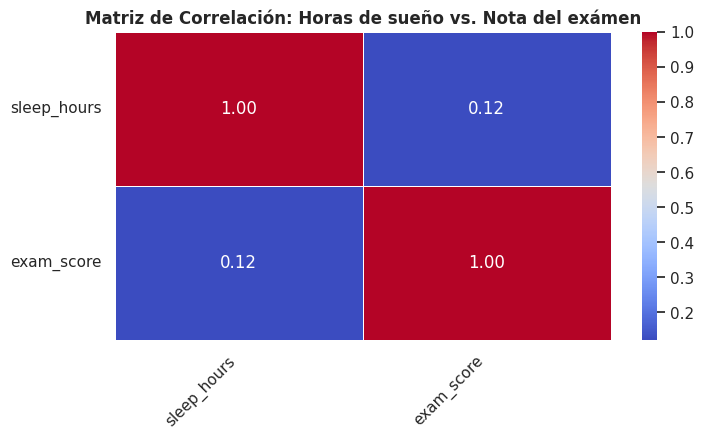

In [ ]:
sleep_corr = df[['sleep_hours', 'exam_score']].corr()

plt.figure(figsize=(8, 4))
sns.heatmap(sleep_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación: Horas de sueño vs. Nota del exámen', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

<ipython-input-51-7148115546fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_bar = sns.barplot(x='exercise_frequency', y='exam_score', data=df, palette='Blues', errorbar='sd') # 'sd' para desviación estándar


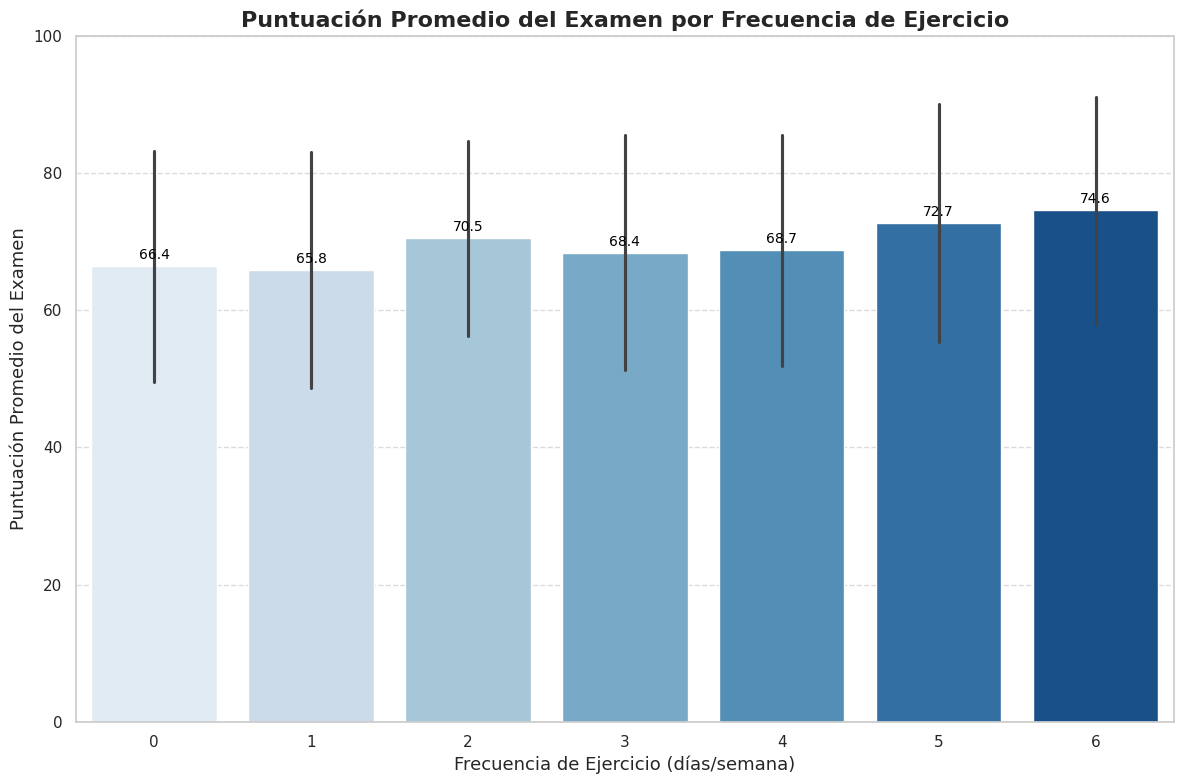

In [ ]:
plt.figure(figsize=(12, 8))
ax_bar = sns.barplot(x='exercise_frequency', y='exam_score', data=df, palette='Blues', errorbar='sd') # 'sd' para desviación estándar
# Añadir etiquetas de valor
for container in ax_bar.containers:
    ax_bar.bar_label(container, fmt='%.1f', fontsize=10, padding=3, color='black') # Formato a 1 decimal

plt.title('Puntuación Promedio del Examen por Frecuencia de Ejercicio', fontsize=16, fontweight='bold')
plt.xlabel('Frecuencia de Ejercicio (días/semana)', fontsize=13)
plt.ylabel('Puntuación Promedio del Examen', fontsize=13)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Conclusiones + Insights bloque 1:
Se observa que aquellos alumnos que llevan una alimentación buena o justa obtienen levemente mejores resultados que aquellos alumnos que se alimentan a base de una dieta pobre.
La correlación en entre el resultado del exámen y las horas de sueño es escasamente positiva.
Los alumnos que practican ejercicio físico dos o más veces por semana obtienen mejores resultados que los demás. Siendo los que practican 5 o 6 veces por semana los que mejores resultados obtuvieron.

## 2.9 BLOQUE 2: ¿Cómo afecta el tiempo dedicado a las redes sociales y  netflix en el resultado académico? ¿Es importante tener buen acceso a internet para tener buenas notas?

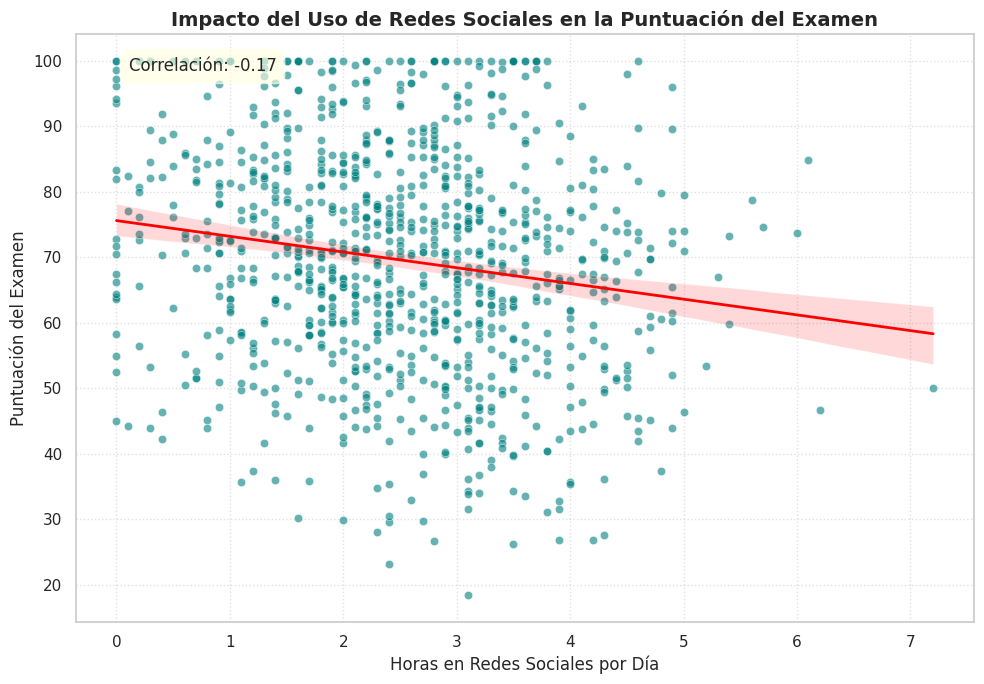

In [ ]:
# Gráfico para "Horas en Redes Sociales"
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='social_media_hours', y='exam_score', alpha=0.6, color='teal')
sns.regplot(data=df, x='social_media_hours', y='exam_score', scatter=False, color='red', line_kws={'linestyle': '-', 'linewidth': 2})

# Calcular y añadir correlación
correlation_social_media = df['social_media_hours'].corr(df['exam_score'])
plt.text(0.05, 0.95, f'Correlación: {correlation_social_media:.2f}', transform=ax.transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='lightyellow', alpha=0.6))

plt.title('Impacto del Uso de Redes Sociales en la Puntuación del Examen', fontsize=14, fontweight='bold')
plt.xlabel('Horas en Redes Sociales por Día', fontsize=12)
plt.ylabel('Puntuación del Examen', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

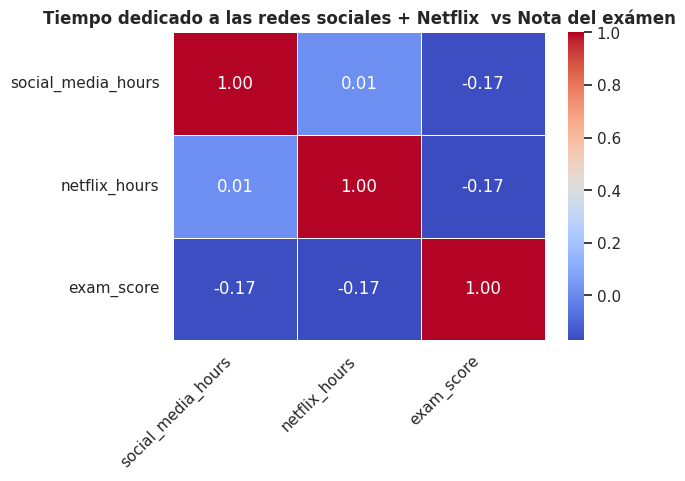

In [ ]:
socialmedia_netflix_corr = df[['social_media_hours','netflix_hours', 'exam_score']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(socialmedia_netflix_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Tiempo dedicado a las redes sociales + Netflix  vs Nota del exámen', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

<ipython-input-71-fb95680a9457>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='internet_quality', y='exam_score', data=df, order=order_internet, palette='viridis')


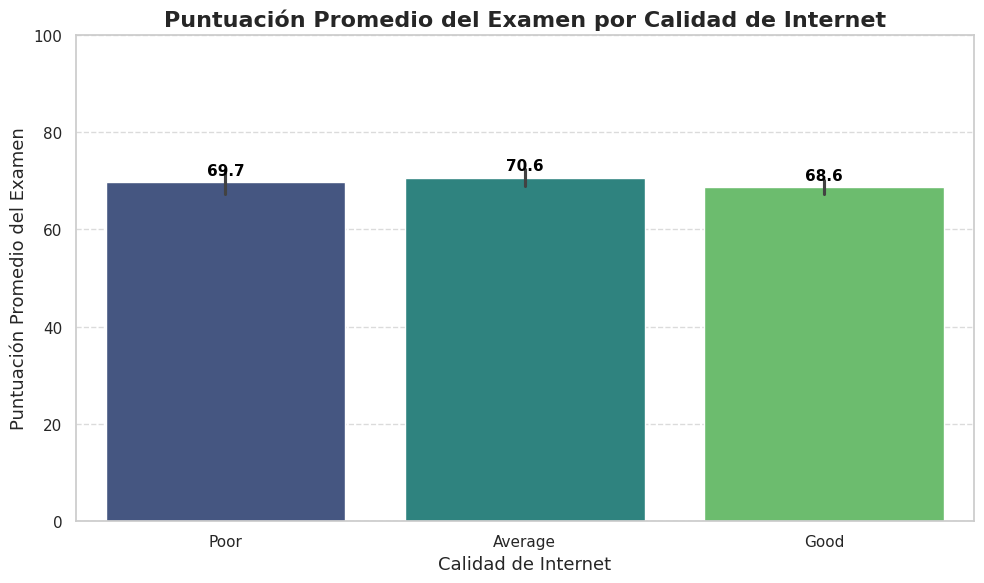

In [ ]:
# Gráfico para "Calidad de Internet"
plt.figure(figsize=(10, 6))
order_internet = ['Poor', 'Average', 'Good'] # Asegurar el orden lógico
ax = sns.barplot(x='internet_quality', y='exam_score', data=df, order=order_internet, palette='viridis')

# Añadir las etiquetas de valor en las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=11, padding=3, color='black', fontweight='bold')

plt.title('Puntuación Promedio del Examen por Calidad de Internet', fontsize=16, fontweight='bold')
plt.xlabel('Calidad de Internet', fontsize=13)
plt.ylabel('Puntuación Promedio del Examen', fontsize=13)
plt.ylim(0, 100) # Asegurar el rango del examen
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Conclusiones + Insights bloque 2:
Las visualizaciones demuestran que tanto el tiempo dedicado a las redes sociales como el tiempo usando la plataforma netflix tienen una correlación levemente negativa con la nota de exámen. Lo cual indicaría que es recomendable no pasar mucho tiempo haciendo éste tipo de actividades para lograr un mejor resultado académico.  
En cuanto a la calidad de internet, no hay diferencias considerables en el resultado del exámen entre los alumnos que cuentan con acceso a una buena o mala calidad de internet.

## 2.10 BLOQUE 3: ¿Cuál es el hábito más determinante para el éxito académico?

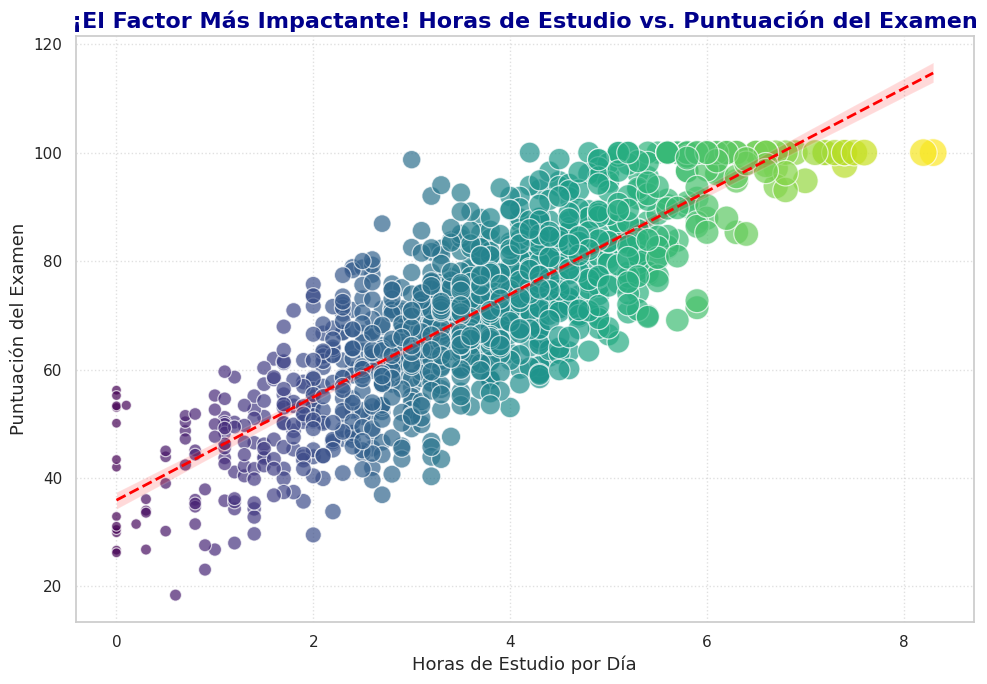

In [ ]:
# Gráfico de Dispersión: exam_score_vs_study_hours (EL CLAVE)
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score',
                hue='study_hours_per_day', size='study_hours_per_day',
                sizes=(50, 400),
                alpha=0.7, palette='viridis', legend=False)
sns.regplot(data=df, x='study_hours_per_day', y='exam_score',
            scatter=False, color='red', line_kws={'linestyle': '--', 'linewidth': 2})
plt.title('¡El Factor Más Impactante! Horas de Estudio vs. Puntuación del Examen', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Horas de Estudio por Día', fontsize=13)
plt.ylabel('Puntuación del Examen', fontsize=13)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

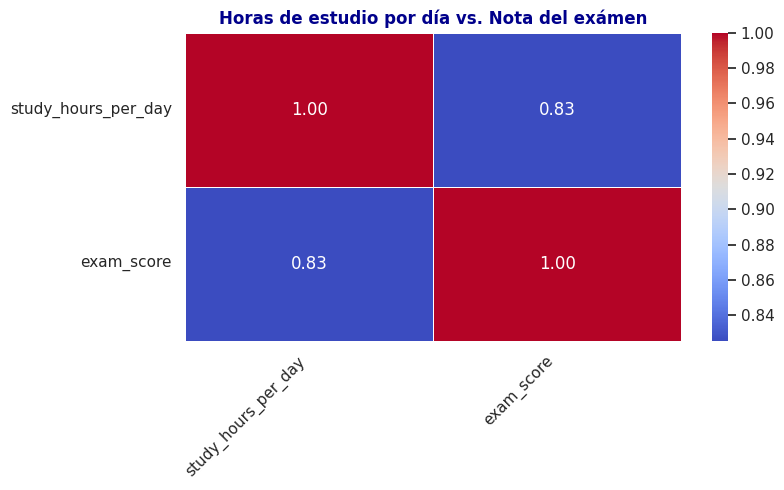

In [ ]:
study_hours_corr = df[['study_hours_per_day', 'exam_score']].corr()

plt.figure(figsize=(8, 4))
sns.heatmap(study_hours_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Horas de estudio por día vs. Nota del exámen', fontsize=12, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

Conclusiones + Insights bloque 3:
Los hábitos de estudio (horas de estudio por día) resultan ser determinantes para el éxito académico (mejores notas) con una correlacion positiva de 0.83.

# 3. PREPROCESAMIENTO DE DATOS

## 3.1 Definición de features para la predicción de la variable objetivo (exam_score)

In [ ]:
# Definición de la variable objetivo
target ='exam_score'

In [ ]:
# Definición de las variables numéricas
numerical_features_for_scaling = [
    'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating'
]

In [ ]:
# Definición de variables categóricas para Ordinal Encoding (con orden)
ordinal_features_for_encoding = ['diet_quality', 'parental_education_level', 'internet_quality']

diet_quality_order = ['Poor', 'Fair', 'Good']

parental_education_level_order = ['None', 'Unknown', 'High School', 'Bachelor', 'Master']

internet_quality_order = ['Poor', 'Average', 'Good']

In [ ]:
# Variables categóricas para One-Hot Encoding (nominales)
categorical_features_for_encoding = ['gender', 'part_time_job', 'extracurricular_participation']

## 3.2 Transformadores para el preprocesamiento

In [ ]:
# Creación los transformadores para el preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(categories=[diet_quality_order,
                                                parental_education_level_order,
                                                internet_quality_order]), ordinal_features_for_encoding),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features_for_encoding),
        ('passthrough', 'passthrough', numerical_features_for_scaling)
    ],
    remainder='drop'
)


In [ ]:
preprocessor

ColumnTransformer(transformers=[('ordinal',
                                 OrdinalEncoder(categories=[['Poor', 'Fair',
                                                             'Good'],
                                                            ['None', 'Unknown',
                                                             'High School',
                                                             'Bachelor',
                                                             'Master'],
                                                            ['Poor', 'Average',
                                                             'Good']]),
                                 ['diet_quality', 'parental_education_level',
                                  'internet_quality']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['gender', 'part_time_job',
                                  'extracurricular_participation']),
                                ('passthrough', 'passthrough',
                                 ['age', 'study_hours_per_day',
                                  'social_media_hours', 'netflix_hours',
                                  'attendance_percentage', 'sleep_hours',
                                  'exercise_frequency',
                                  'mental_health_rating'])])

In [ ]:
# Definimos las características (X) de la variable objetivo (y)
X = df.drop(columns=[target, 'student_id'])
y = df[target]

In [ ]:
# Aplicamos el preprocesamiento
X_processed = preprocessor.fit_transform(X)

In [ ]:
 # Nombres de las columnas después del preprocesamiento
ordinal_features_names = ordinal_features_for_encoding
categorical_features_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_features_for_encoding)
processed_features_names = ordinal_features_names + list(categorical_features_names) + numerical_features_for_scaling
X_processed_df = pd.DataFrame(X_processed, columns=processed_features_names)

In [ ]:
print("\nVariables después de la Codificación (Primeras 5 filas de X_processed_df):")
print(X_processed_df.head())


Variables después de la Codificación (Primeras 5 filas de X_processed_df):
   diet_quality  parental_education_level  internet_quality  gender_Female  \
0           1.0                       4.0               1.0            1.0   
1           2.0                       2.0               1.0            1.0   
2           0.0                       2.0               0.0            0.0   
3           0.0                       4.0               2.0            1.0   
4           1.0                       4.0               2.0            1.0   

   gender_Male  gender_Other  part_time_job_No  part_time_job_Yes  \
0          0.0           0.0               1.0                0.0   
1          0.0           0.0               1.0                0.0   
2          1.0           0.0               1.0                0.0   
3          0.0           0.0               1.0                0.0   
4          0.0           0.0               1.0                0.0   

   extracurricular_participation_No  ext

In [ ]:
print("\nDimensiones del DataFrame de características preprocesado (X_processed_df.shape):")
print(X_processed_df.shape)


Dimensiones del DataFrame de características preprocesado (X_processed_df.shape):
(1000, 18)


In [ ]:
print("\nVariables objetivo (y.head()):")
print(y.head())


Variables objetivo (y.head()):
0     56.2
1    100.0
2     34.3
3     26.8
4     66.4
Name: exam_score, dtype: float64


# 4. CONSTRUCCIÓN Y EVALUACIÓN DEL MODELO

## 4.1 División de Datos y entrenamiento del modelo

In [ ]:
# División de Datos (Train-Test Split)
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

print(f"Dimensiones del conjunto de entrenamiento (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Dimensiones del conjunto de prueba (X_test, y_test): {X_test.shape}, {y_test.shape}\n")

Dimensiones del conjunto de entrenamiento (X_train, y_train): (800, 18), (800,)
Dimensiones del conjunto de prueba (X_test, y_test): (200, 18), (200,)



In [ ]:
# Inicialización y Entrenamiento del Modelo Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

## 4.2 Evaluación del modelo

In [ ]:
# Realizar Predicciones en el Conjunto de Prueba
y_pred = model.predict(X_test)

In [ ]:
# Evaluación del Modelo

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinación (R-cuadrado - R^2): {r2:.2f}")

Error Absoluto Medio (MAE): 4.98
Error Cuadrático Medio (MSE): 39.32
Raíz del Error Cuadrático Medio (RMSE): 6.27
Coeficiente de Determinación (R-cuadrado - R^2): 0.85


In [ ]:
# Predicciones vs. valores reales
print("\nPrimeras 10 Predicciones vs. Valores Reales:")
predictions_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(predictions_df.head(10))


Primeras 10 Predicciones vs. Valores Reales:
   Actual  Predicted
0    64.2     66.697
1    72.7     86.711
2    79.0     78.279
3    79.5     72.818
4    58.2     57.440
5    53.4     61.642
6    70.8     68.080
7    62.5     59.664
8    36.8     45.726
9    67.6     75.251


In [ ]:
# Importancia de las características
print("\nImportancia de las características (Top 10):")
feature_importances = pd.Series(model.feature_importances_, index=X_processed_df.columns).sort_values(ascending=False)
print(feature_importances.head(10))


Importancia de las características (Top 10):
study_hours_per_day         0.707692
mental_health_rating        0.106170
social_media_hours          0.038299
sleep_hours                 0.037244
netflix_hours               0.034792
exercise_frequency          0.025072
attendance_percentage       0.020470
age                         0.008990
parental_education_level    0.004618
diet_quality                0.004207
dtype: float64


## 4.3 Conclusiones

A partir del análisis y la construcción del modelo de regresión, se puede afirmar con confianza que la Hipótesis Alternativa (H1) es respaldada por los resultados obtenidos.

Se logró construir un modelo que predice la exam_score (puntuación del examen) de los estudiantes utilizando diversas características (demográficas, hábitos de estudio, uso de tecnología, estilo de vida, entorno de apoyo y bienestar mental) con un rendimiento notablemente superior al de un modelo ingenuo.

Los métricas de evaluación del modelo son las siguientes:

    Error Absoluto Medio (MAE): 4.98
        Esto significa que, en promedio, las predicciones del modelo se desvían de las puntuaciones reales del examen en aproximadamente 4.98 puntos.
    Error Cuadrático Medio (MSE): 39.32
    Raíz del Error Cuadrático Medio (RMSE): 6.27
        El RMSE, al estar en la misma escala que la variable objetivo (exam_score), indica que la desviación estándar de los errores de predicción es de aproximadamente 6.27 puntos.
    Coeficiente de Determinación (R-cuadrado - R²): 0.85
        Este es un resultado particularmente fuerte. Un R² de 0.85 significa que el 85% de la variabilidad en las puntuaciones del examen puede ser explicada por las características incluidas en el modelo. Esto supera significativamente la expectativa inicial de un R² > 0.60.

Es importante destacar que, durante el preprocesamiento de los datos, se optó por no eliminar los valores atípicos (outliers). Esta decisión se basó en la consideración de que, en este contexto particular, los outliers representan valores genuinos y variaciones normales dentro de la población estudiantil, y su inclusión contribuye a un modelo más realista y generalizable.

En síntesis, el modelo desarrollado demuestra una alta capacidad predictiva, confirmando que las características analizadas son, en conjunto, determinantes clave del rendimiento académico de los estudiantes.